In [109]:
## testing for Insulin cases by splitting data into two different sets 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from statsmodels.formula.api import glm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [110]:
# Load the data into a DataFrame; testinginsulin
df = pd.read_csv('/Users/khushbooteotia/Documents/machineLearningTest/cleanseddata.csv')

In [111]:
#cleansing temperature_mean
df['temperature_mean'] = df['temperature_mean'].apply(lambda x: 0 if x < 32 else x)
df['temperature_mean'] = df['temperature_mean'].apply(lambda x: 0 if x > 45 else x)
df['temperature_mean'] = df['temperature_mean'].apply(lambda x: 36.5 if x == 0 or pd.isna(x) else x)

# MBP
df['mbp_mean'] = df['mbp_mean'].apply(lambda x: 0 if x < 0 else x)
df['mbp_mean'] = df['mbp_mean'].apply(lambda x: 0 if x > 200 else x)
df['mbp_mean'] = df['mbp_mean'].apply(lambda x: 85 if x == 0 or pd.isna(x) else x)

In [112]:
df.fillna(0, inplace=True)  # Account for NaNs in subset

In [113]:
df['diabetes_types'] = df['diabetes_types'].replace(0, 'none')
df['diabetes_types'] = df['diabetes_types'].replace(1.0, 'one')
df['diabetes_types'] = df['diabetes_types'].replace(2.0, 'two')
categorical_vars = ['diabetes_types']
dummy_vars1 = pd.get_dummies(df[categorical_vars])
df = pd.concat([df, dummy_vars1], axis=1)

df.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,race,language,...,ph_min,po2_min,spo2_mean,resp_rate_mean,heart_rate_mean,temperature_mean,mbp_mean,diabetes_types_none,diabetes_types_one,diabetes_types_two
0,14223179,28962684,31389905,Neuro Stepdown,Neuro Surgical Intensive Care Unit (Neuro SICU),2189-01-08 09:35:00,2189-01-10 21:04:47,2.479016,WHITE,ENGLISH,...,7.35,90.0,95.375000,17.312500,73.500000,36.454000,106.333333,True,False,False
1,19611589,27643931,32371355,Neuro Stepdown,Neuro Stepdown,2174-11-19 22:27:00,2174-11-22 19:32:18,2.878681,WHITE,ENGLISH,...,7.35,90.0,95.111111,18.555556,94.260870,36.668571,102.125000,False,False,True
2,19147123,27351170,34740339,Neuro Stepdown,Neuro Stepdown,2171-11-16 11:28:51,2171-11-22 15:44:44,6.177697,BLACK/AFRICAN AMERICAN,ENGLISH,...,7.35,90.0,93.526316,23.894737,87.222222,37.256000,110.500000,False,False,True
3,15617454,24021087,35826606,Neuro Stepdown,Neuro Stepdown,2168-05-31 10:12:13,2168-06-12 17:49:01,12.317222,ASIAN - CHINESE,?,...,7.35,90.0,96.600000,15.333333,70.933333,36.855714,96.529412,True,False,False
4,10096175,21035896,31525858,Neuro Intermediate,Neuro Surgical Intensive Care Unit (Neuro SICU),2135-01-10 18:29:19,2135-01-16 21:27:03,6.123426,WHITE,ENGLISH,...,7.35,90.0,91.941176,20.550000,72.700000,37.120000,83.725000,False,False,True


In [114]:
categorical_vars2 = ['gender']
dummy_vars = pd.get_dummies(df[categorical_vars2])
sex_df = pd.concat([df, dummy_vars], axis=1)

sex_df.fillna(0, inplace=True)

sex_df.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,race,language,...,spo2_mean,resp_rate_mean,heart_rate_mean,temperature_mean,mbp_mean,diabetes_types_none,diabetes_types_one,diabetes_types_two,gender_F,gender_M
0,14223179,28962684,31389905,Neuro Stepdown,Neuro Surgical Intensive Care Unit (Neuro SICU),2189-01-08 09:35:00,2189-01-10 21:04:47,2.479016,WHITE,ENGLISH,...,95.375000,17.312500,73.500000,36.454000,106.333333,True,False,False,False,True
1,19611589,27643931,32371355,Neuro Stepdown,Neuro Stepdown,2174-11-19 22:27:00,2174-11-22 19:32:18,2.878681,WHITE,ENGLISH,...,95.111111,18.555556,94.260870,36.668571,102.125000,False,False,True,False,True
2,19147123,27351170,34740339,Neuro Stepdown,Neuro Stepdown,2171-11-16 11:28:51,2171-11-22 15:44:44,6.177697,BLACK/AFRICAN AMERICAN,ENGLISH,...,93.526316,23.894737,87.222222,37.256000,110.500000,False,False,True,False,True
3,15617454,24021087,35826606,Neuro Stepdown,Neuro Stepdown,2168-05-31 10:12:13,2168-06-12 17:49:01,12.317222,ASIAN - CHINESE,?,...,96.600000,15.333333,70.933333,36.855714,96.529412,True,False,False,False,True
4,10096175,21035896,31525858,Neuro Intermediate,Neuro Surgical Intensive Care Unit (Neuro SICU),2135-01-10 18:29:19,2135-01-16 21:27:03,6.123426,WHITE,ENGLISH,...,91.941176,20.550000,72.700000,37.120000,83.725000,False,False,True,True,False


In [115]:
# Assuming your DataFrame is named 'df'
sex_df['language'] = sex_df['language'].replace({"?": 1, "ENGLISH": 0})
sex_df.head()


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,race,language,...,spo2_mean,resp_rate_mean,heart_rate_mean,temperature_mean,mbp_mean,diabetes_types_none,diabetes_types_one,diabetes_types_two,gender_F,gender_M
0,14223179,28962684,31389905,Neuro Stepdown,Neuro Surgical Intensive Care Unit (Neuro SICU),2189-01-08 09:35:00,2189-01-10 21:04:47,2.479016,WHITE,0,...,95.375000,17.312500,73.500000,36.454000,106.333333,True,False,False,False,True
1,19611589,27643931,32371355,Neuro Stepdown,Neuro Stepdown,2174-11-19 22:27:00,2174-11-22 19:32:18,2.878681,WHITE,0,...,95.111111,18.555556,94.260870,36.668571,102.125000,False,False,True,False,True
2,19147123,27351170,34740339,Neuro Stepdown,Neuro Stepdown,2171-11-16 11:28:51,2171-11-22 15:44:44,6.177697,BLACK/AFRICAN AMERICAN,0,...,93.526316,23.894737,87.222222,37.256000,110.500000,False,False,True,False,True
3,15617454,24021087,35826606,Neuro Stepdown,Neuro Stepdown,2168-05-31 10:12:13,2168-06-12 17:49:01,12.317222,ASIAN - CHINESE,1,...,96.600000,15.333333,70.933333,36.855714,96.529412,True,False,False,False,True
4,10096175,21035896,31525858,Neuro Intermediate,Neuro Surgical Intensive Care Unit (Neuro SICU),2135-01-10 18:29:19,2135-01-16 21:27:03,6.123426,WHITE,0,...,91.941176,20.550000,72.700000,37.120000,83.725000,False,False,True,True,False


In [116]:
categorical_vars1 = ['race_group']
dummy_vars = pd.get_dummies(sex_df[categorical_vars1])
race_df = pd.concat([sex_df, dummy_vars], axis=1)

race_df.fillna(0, inplace=True)

race_df.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,race,language,...,mbp_mean,diabetes_types_none,diabetes_types_one,diabetes_types_two,gender_F,gender_M,race_group_Asian,race_group_Black,race_group_Hispanic,race_group_White
0,14223179,28962684,31389905,Neuro Stepdown,Neuro Surgical Intensive Care Unit (Neuro SICU),2189-01-08 09:35:00,2189-01-10 21:04:47,2.479016,WHITE,0,...,106.333333,True,False,False,False,True,False,False,False,True
1,19611589,27643931,32371355,Neuro Stepdown,Neuro Stepdown,2174-11-19 22:27:00,2174-11-22 19:32:18,2.878681,WHITE,0,...,102.125000,False,False,True,False,True,False,False,False,True
2,19147123,27351170,34740339,Neuro Stepdown,Neuro Stepdown,2171-11-16 11:28:51,2171-11-22 15:44:44,6.177697,BLACK/AFRICAN AMERICAN,0,...,110.500000,False,False,True,False,True,False,True,False,False
3,15617454,24021087,35826606,Neuro Stepdown,Neuro Stepdown,2168-05-31 10:12:13,2168-06-12 17:49:01,12.317222,ASIAN - CHINESE,1,...,96.529412,True,False,False,False,True,True,False,False,False
4,10096175,21035896,31525858,Neuro Intermediate,Neuro Surgical Intensive Care Unit (Neuro SICU),2135-01-10 18:29:19,2135-01-16 21:27:03,6.123426,WHITE,0,...,83.725000,False,False,True,True,False,False,False,False,True


Training data set length=17448
Testing data set length=7479
                 Generalized Linear Model Regression Results                  
Dep. Variable:       totalgluc_perLOS   No. Observations:                 9809
Model:                            GLM   Df Residuals:                     9775
Model Family:        NegativeBinomial   Df Model:                           33
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33769.
Date:                Wed, 26 Jul 2023   Deviance:                       2130.7
Time:                        15:01:10   Pearson chi2:                     796.
No. Iterations:                   100   Pseudo R-squ. (CS):            0.05933
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

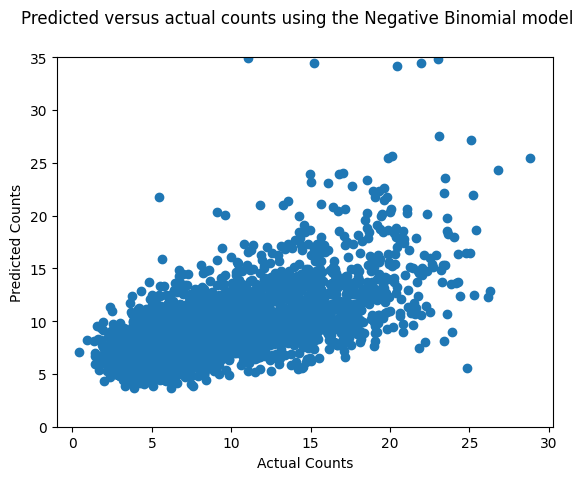

In [120]:

race_df['insulin_normalized'] = race_df['totalinsulin_perLOS'] / race_df['avg_weight']

split_index = int(len(race_df) * 0.7)  # 80% for training, 20% for testing

race_df_train = race_df[:split_index]
race_df_test = race_df[split_index:]
print('Training data set length=' + str(len(race_df_train)))
print('Testing data set length=' + str(len(race_df_test)))

expr = 'totalgluc_perLOS ~ insulin_normalized + temperature_mean + spo2_mean + heart_rate_mean + mbp_mean + hadInsulinDayOne + connective_disease + resp_rate_mean + po2_min + copd_present + language + cad_present + heart_failure_present + gender_F + admElective + anchor_year_group + biliary + pneumonia + uti + ckd_stages + asthma_present + age + SOFA + charlson_comorbidity_index + diabetes_types_one + diabetes_types_two + race_group_Asian + race_group_Black + race_group_Hispanic + skin + hadMeasurmentDayOne'

y_train, X_train = dmatrices(expr, race_df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, race_df_test, return_type='dataframe')

# Creating the Negative Binomial model
nb_training_results = sm.GLM(y_train, X_train, family = sm.families.NegativeBinomial(alpha = 2)).fit()


print(nb_training_results.summary())

# Extract coefficient names and values
coef_names = nb_training_results.params.index
coef_values = nb_training_results.params.values

# Calculate exponentiated coefficients
coef_exp = np.exp(coef_values)
print(coef_exp)

negbin_predictions = nb_training_results.predict(X_test)
predicted_counts = negbin_predictions
actual_counts = y_test['totalgluc_perLOS']

# Calculate RMSE for the negative binomial model
rmse = np.sqrt(np.mean(np.power(predicted_counts - actual_counts, 2)))
print('Negative Binomial RMSE=', rmse)

# Calculate R-squared for count data models
total_var = np.sum(np.power(actual_counts - np.mean(actual_counts), 2))
deviance = np.sum(np.power(actual_counts - predicted_counts, 2))
r2_count = 1 - (deviance / total_var)
print("R-squared (Count Data Models):", r2_count)


#Accuracy of the test set

print("R-square of train set: ", round(r2_score(y_test, predicted_counts)*100, 2), "%")

# Creating and plotting the graph
fig = plt.figure()
fig.suptitle('Predicted versus actual counts using the Negative Binomial model')
plt.scatter(actual_counts, predicted_counts)
plt.xlabel('Actual Counts')
plt.ylabel('Predicted Counts')
plt.ylim(0,35)
#plt.xlim(0,35)
plt.show()



In [118]:
def calculate_vif(race_df_filtered):
    # Create a DataFrame to store the VIF values
    vif_data = pd.DataFrame()
    vif_data["Feature"] = race_df_filtered.columns
    vif_data["VIF"] = [variance_inflation_factor(race_df_filtered.values, i) for i in range(race_df_filtered.shape[1])]
    return vif_data

# Assuming 'X_train' is a DataFrame containing the predictor variables
vif_result = calculate_vif(X_train)
print(vif_result)


                             Feature          VIF
0                          Intercept  6127.889698
1           hadInsulinDayOne[T.True]     1.122132
2                   gender_F[T.True]     1.051365
3                admElective[T.True]     1.062584
4   anchor_year_group[T.2011 - 2013]     1.201998
5   anchor_year_group[T.2014 - 2016]     1.264211
6   anchor_year_group[T.2017 - 2019]     1.356095
7         diabetes_types_one[T.True]     1.144523
8         diabetes_types_two[T.True]     1.823903
9           race_group_Asian[T.True]     1.177678
10          race_group_Black[T.True]     1.104671
11       race_group_Hispanic[T.True]     1.286807
12       hadMeasurmentDayOne[T.True]     1.099313
13                insulin_normalized     1.003542
14                  temperature_mean     1.147831
15                         spo2_mean     1.045754
16                   heart_rate_mean     1.273799
17                          mbp_mean     1.146816
18                connective_disease     1.047310
